<a href="https://colab.research.google.com/github/Tejesh-25/Extracting-Business-Card-Data-with-OCR/blob/BizCardX/Cardekho_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cardekho
Predict the second hand car price using maching learning algorithms


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_excel("/content/CAR DETAILS FROM CAR DEKHO.xlsx")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
# In the above dataframe there are 4340 rows and 8 columns or features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


 With the help df.info function I found there is no null values i.e. there is no missing values in the dataset and the datatypes are metioned properly so, I can move further.The next step is to change the categorical variable to numeric from with help of encoding.

In [ ]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In the above dataframe the owner is the categorical variable so I need to covert the categorical variable to numerical variable.I perfered ordinal encoding because first owner and test driver car has higher price in the market compare to second owner, third owner and forth and above owner.
so, I am going to give:

4- first owner and test driver car
3- second owner
2- third owner
1- forth and above owner

In [ ]:
mapping_owner={"First Owner":4,"Test Drive Car":4,"Second Owner":3,"Third Owner":2,"Fourth & Above Owner":1}
df['owner']=df['owner'].map(mapping_owner)

In [ ]:
df['owner'].isnull().value_counts()

False    4340
Name: owner, dtype: int64

In [ ]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [ ]:
df[df['transmission']=='Automatic']['selling_price']

12      1650000
25      1650000
29      1964999
30      1425000
31       975000
         ...   
4300     999000
4302    1050000
4304    3899000
4311    1900000
4313    2800000
Name: selling_price, Length: 448, dtype: int64

In [ ]:
df[df['transmission']=='Manual']['selling_price']

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 3892, dtype: int64

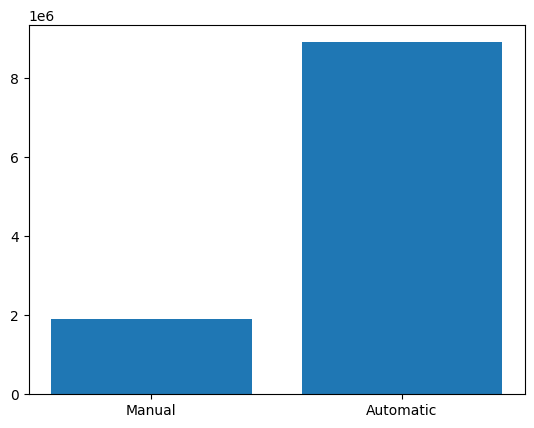

In [ ]:
x=df['transmission']
y=df['selling_price']
plt.bar(x,y)
plt.show()

With the help above details I can infer that the Automatic cars are sold in higher price than the Manual Cars. I can do the ordinal encoding like :

Automatic -2
Manual -1

In [ ]:
mapping_transmission={"Manual":1,"Automatic":2}
df['transmission']=df['transmission'].map(mapping_transmission)

In [ ]:
df['transmission'].isnull().value_counts()

False    4340
Name: transmission, dtype: int64

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,4
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,1,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,3


In [ ]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

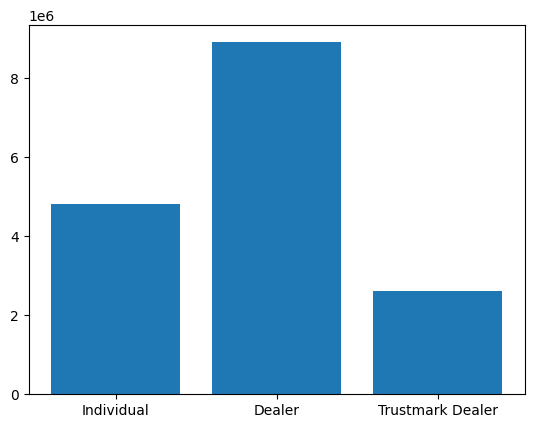

In [ ]:
x=df['seller_type']
y=df['selling_price']
plt.bar(x,y)
plt.show()

In [ ]:
max_trustmarkdealer=df[df['seller_type']=='Trustmark Dealer']['selling_price'].max()
max_dealer=df[df['seller_type']=='Dealer']['selling_price'].max()
max_individual=df[df['seller_type']=='Individual']['selling_price'].max()
print(max_trustmarkdealer,max_dealer,max_individual)

2600000 8900000 4800000


According to bar graph as well as maximum price for the three different seller type the higher weightage goes to the Dealer first, second to the Individual and third to the trustmark dealer.
dealer-3
Individual-2
trustmarkdealer-1

In [ ]:
mapping_sellerType={"Individual":2,"Dealer":3,"Trustmark Dealer":1}
df['seller_type']=df['seller_type'].map(mapping_sellerType)

In [ ]:
df['seller_type'].isnull().value_counts()

False    4340
Name: seller_type, dtype: int64

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,2,1,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,2,1,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,2,1,4
3,Datsun RediGO T Option,2017,250000,46000,Petrol,2,1,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,2,1,3


In [ ]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

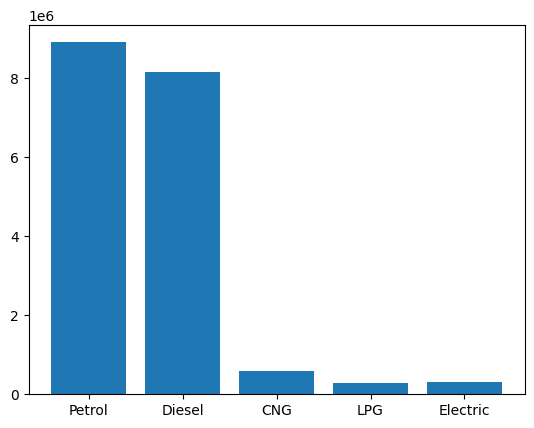

In [ ]:
x=df['fuel']
y=df['selling_price']
plt.bar(x,y)
plt.show()

In [ ]:
max_petrol=df[df['fuel']=='Petrol']['selling_price'].max()
max_diesel=df[df['fuel']=='Diesel']['selling_price'].max()
max_cng=df[df['fuel']=='CNG']['selling_price'].max()
max_lpg=df[df['fuel']=='LPG']['selling_price'].max()
max_electric=df[df['fuel']=='Electric']['selling_price'].max()
print(max_petrol,max_diesel,max_cng,max_lpg,max_electric)

8900000 8150000 595000 290000 310000


With the help of graphical repesentation as well as maximum value's of the fuel. The highest weitage goes to Petrol, Diesel, CNG, Electric and LPG
so we can use the ordinal Encoding.

Petrol-5
Diesel-4
CNG-3
Electric -2
LPG-1

In [ ]:
mapping_fuel={"Petrol":5,"Diesel":4,"CNG":3,"Electric":2,"LPG":1}
df['fuel']=df['fuel'].map(mapping_fuel)

In [ ]:
df['fuel'].isnull().value_counts()

False    4340
Name: fuel, dtype: int64

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,5,2,1,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,5,2,1,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,4,2,1,4
3,Datsun RediGO T Option,2017,250000,46000,5,2,1,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,4,2,1,3


Now I am going to check the unique value for name

In [ ]:
df['name'].nunique()

1491

There 1491 unique car names it is really hard to use nominal encoding for this kind of stituation. So, I am going to Extract the first name of the cars instead of full name.

In [ ]:
df['name']=df['name'].str.split(" ").str[0]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,5,2,1,4
1,Maruti,2007,135000,50000,5,2,1,4
2,Hyundai,2012,600000,100000,4,2,1,4
3,Datsun,2017,250000,46000,5,2,1,4
4,Honda,2014,450000,141000,4,2,1,3


Now we can check for the unique names for cars. So, I am going to use the same df.nunique method to find the unique values

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,5,2,1,4
1,Maruti,2007,135000,50000,5,2,1,4
2,Hyundai,2012,600000,100000,4,2,1,4
3,Datsun,2017,250000,46000,5,2,1,4
4,Honda,2014,450000,141000,4,2,1,3


In [ ]:
df['name'].nunique()

29

Now there is only 29 unique name of cars so Now I am going to use Nominal encoding.

In [ ]:
newdf=pd.get_dummies(df['name'],drop_first=True)

While using nominal encoding. we should use n-1 dummies.so I droped the Ambassador. After this I am going to concat both data frames to predict the price of the car.

In [ ]:
prediction_df=pd.concat([df,newdf],axis=1)

In [ ]:
prediction_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Audi,BMW,...,Mercedes-Benz,Mitsubishi,Nissan,OpelCorsa,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,Maruti,2007,60000,70000,5,2,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Maruti,2007,135000,50000,5,2,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hyundai,2012,600000,100000,4,2,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Datsun,2017,250000,46000,5,2,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Honda,2014,450000,141000,4,2,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0


Now I need to remove the name column because I have dummies so I can predict with dummies

In [ ]:
prediction_df.drop("name",axis=1,inplace=True)

In [ ]:
prediction_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Audi,BMW,Chevrolet,...,Mercedes-Benz,Mitsubishi,Nissan,OpelCorsa,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2007,60000,70000,5,2,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,135000,50000,5,2,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,600000,100000,4,2,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,250000,46000,5,2,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,450000,141000,4,2,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I am going to choose the model

In [ ]:
import seaborn as sns

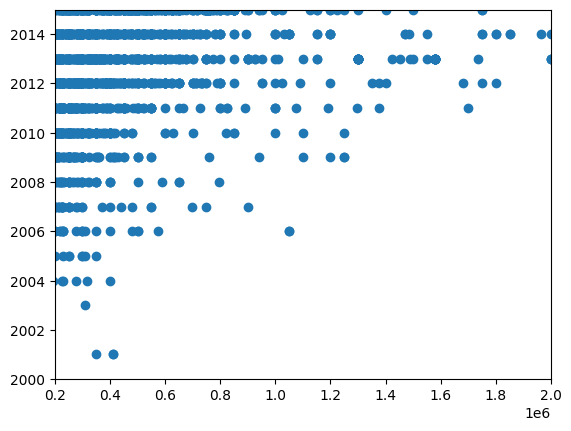

In [ ]:
plt.scatter(x=prediction_df['selling_price'],y=prediction_df['year'])
plt.ylim(2000,2015)
plt.xlim(200000,2000000)
plt.show()

With the help of the above scatter plot I am going to use the Linear Regression for predicting car price

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
X=prediction_df.drop("selling_price",axis=1)
y=prediction_df['selling_price']

In [ ]:
model=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
model.fit(X_train,y_train)
yhat=model.predict(X_test)
print(yhat)

[ 6.77243227e+05  1.89743367e+06  2.83436019e+05  3.07839231e+06
  1.57509546e+05  2.96662721e+05  7.81945723e+05  4.07934655e+05
  9.43354249e+05  5.88512991e+05  4.45917155e+05  4.96023629e+05
  8.82771803e+05  4.40447581e+05  1.30333386e+05  5.26768789e+05
  6.51959776e+05  3.81509601e+05  2.37316447e+04  6.62651986e+05
 -3.33453317e+05  4.51918276e+05  3.98259832e+05  5.85480024e+05
  5.43796314e+05  7.76452677e+05  5.75160637e+05  6.54552133e+05
  6.47909850e+05  4.74446128e+05  5.30736102e+05  5.43020760e+05
  8.93517510e+05  6.63070455e+05  3.20441826e+05  2.78021333e+05
  3.51042447e+05  5.96310122e+04  1.50893151e+05  4.57985409e+05
  1.38299015e+05  5.44805746e+05  2.55944567e+05  2.94427506e+06
  5.08598565e+05  3.23160317e+05 -3.67431351e+04  4.01996823e+05
  9.14323612e+05  2.92312282e+05  1.24705688e+05  5.31708488e+05
  4.24947147e+05  7.88344056e+05  5.68687908e+05  5.80455336e+05
  3.07839231e+06  3.01397978e+05  4.79439095e+05  3.36906548e+05
  2.92357359e+05  7.53712

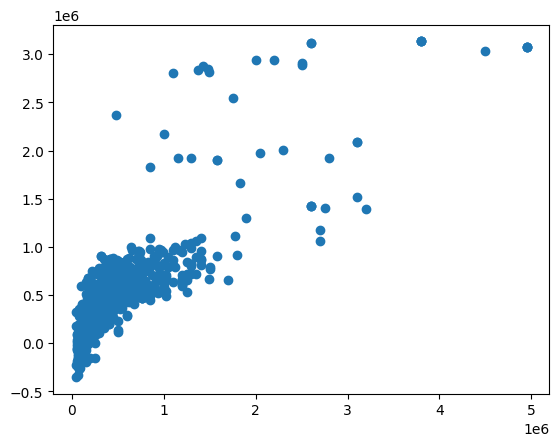

In [ ]:
plt.scatter(y_test,yhat)
plt.show()

<ipython-input-42-8059dc7f8ca5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-yhat)


<Axes: xlabel='selling_price', ylabel='Density'>

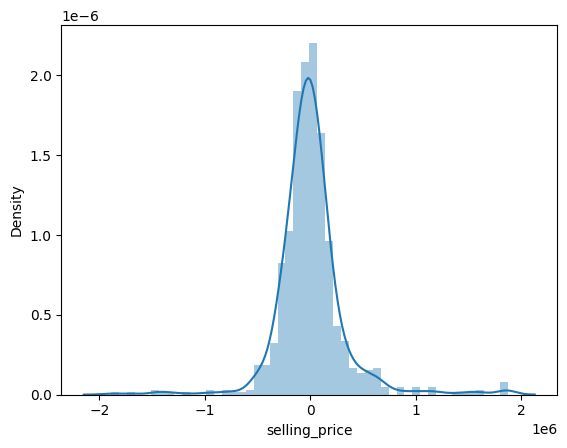

In [ ]:
sns.distplot(y_test-yhat)

I need to check how the model is correctly specified with the evaluation metrics

In [ ]:
model.coef_

array([ 4.23871688e+04, -8.09985262e-01, -9.80470367e+04, -2.55021324e+04,
        3.02154469e+05,  2.08061022e+04,  1.10333497e+06,  1.98461142e+06,
       -1.96539977e+05,  2.32830644e-10, -3.34045902e+05, -1.62292176e+05,
       -2.53104861e+05,  2.88864294e+04,  5.61443107e+03, -8.73713726e+04,
        7.33358467e+05,  1.32394859e+06,  7.85791259e+05,  1.64517271e+05,
        2.74916972e+06,  8.54546323e+05,  3.12718123e+04, -1.09198777e+05,
        2.06716527e+06,  4.39660848e+05, -7.23592252e+04,  1.45392606e+05,
       -1.67960905e+05, -7.41099506e+04, -1.76620793e+05,  3.78536120e+05,
       -9.19690691e+04,  1.86531944e+06])

In [ ]:
model.intercept_

-84680452.1520688

In [ ]:
error=mean_squared_error(y_test,yhat)
print(error)

109665255226.35013


In [ ]:
import math

In [ ]:
rmse=math.sqrt(error)
print(rmse)

331157.44778934104


In [ ]:
error_abs=mean_absolute_error(y_test,yhat)
print(error_abs)

198599.56541512627


In [ ]:
eval_metrics=r2_score(y_test,yhat)
print(eval_metrics)

0.7046858757442312


r2_score is 0.704 that is My model predicts 70% accurate in predicting car price.

With help of Lasso- L1 regularization I can do feature Engineering.

In [ ]:
ls=Lasso()
ls.fit(X_train,y_train)
yhat_ls=ls.predict(X_test)
print(yhat)

[ 6.77243227e+05  1.89743367e+06  2.83436019e+05  3.07839231e+06
  1.57509546e+05  2.96662721e+05  7.81945723e+05  4.07934655e+05
  9.43354249e+05  5.88512991e+05  4.45917155e+05  4.96023629e+05
  8.82771803e+05  4.40447581e+05  1.30333386e+05  5.26768789e+05
  6.51959776e+05  3.81509601e+05  2.37316447e+04  6.62651986e+05
 -3.33453317e+05  4.51918276e+05  3.98259832e+05  5.85480024e+05
  5.43796314e+05  7.76452677e+05  5.75160637e+05  6.54552133e+05
  6.47909850e+05  4.74446128e+05  5.30736102e+05  5.43020760e+05
  8.93517510e+05  6.63070455e+05  3.20441826e+05  2.78021333e+05
  3.51042447e+05  5.96310122e+04  1.50893151e+05  4.57985409e+05
  1.38299015e+05  5.44805746e+05  2.55944567e+05  2.94427506e+06
  5.08598565e+05  3.23160317e+05 -3.67431351e+04  4.01996823e+05
  9.14323612e+05  2.92312282e+05  1.24705688e+05  5.31708488e+05
  4.24947147e+05  7.88344056e+05  5.68687908e+05  5.80455336e+05
  3.07839231e+06  3.01397978e+05  4.79439095e+05  3.36906548e+05
  2.92357359e+05  7.53712

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.850e+14, tolerance: 1.129e+11
  model = cd_fast.enet_coordinate_descent(


In [ ]:
ls.coef_

array([ 4.23890026e+04, -8.09846099e-01, -9.80488947e+04, -2.54856782e+04,
        3.02257613e+05,  2.08057131e+04,  1.10019181e+06,  1.98142189e+06,
       -1.99477834e+05,  0.00000000e+00, -3.36894698e+05, -1.65140802e+05,
       -2.52588373e+05,  2.58941513e+04,  2.62308980e+03, -9.03367405e+04,
        7.26922128e+05,  1.32018984e+06,  7.81671959e+05,  1.57980120e+05,
        2.74540078e+06,  8.47993455e+05,  2.82898692e+04, -1.12159522e+05,
        2.06395012e+06,  4.35975417e+05, -7.52550494e+04,  1.40712635e+05,
       -1.70900485e+05, -7.70493369e+04, -1.79573320e+05,  3.75528289e+05,
       -9.49109921e+04,  1.86108472e+06])

In [ ]:
ls.intercept_

-84681318.72187862

In [ ]:
eval_ls=r2_score(y_test,yhat_ls)
print(eval_ls)

0.7046943478898469


Both the Linear Regression model and Lasso Regression have similar r2_score but Lasso has the hyper Parameter if I increase the hyper parmeter to some extend the less weightage features will became to zero.So, I can use this which are feature are most important in the given dataset.    

In [ ]:
ls=Lasso(10000)
ls.fit(X_train,y_train)
yhat_ls=ls.predict(X_test)

In [ ]:
ls.coef_

array([ 4.22348124e+04, -5.90095728e-01, -1.37928537e+05,  0.00000000e+00,
        6.99457884e+05,  1.00445626e+04,  3.76002938e+04,  4.10746386e+05,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.35718592e+04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.43437353e+04,
        2.13612477e+05,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -3.47141873e+04,  1.13436524e+05,
       -0.00000000e+00,  0.00000000e+00])

In [ ]:
ls.intercept_

-84665307.59292142

In [ ]:
eval_ls1=r2_score(y_test,yhat_ls)
print(eval_ls1)

0.5376801755315975


Now we can see the r2_score is decreased. It is due to the less weightage features or independent variable are in the dataset  

In [ ]:
X.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG',
       'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan',
       'OpelCorsa', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'],
      dtype='object')

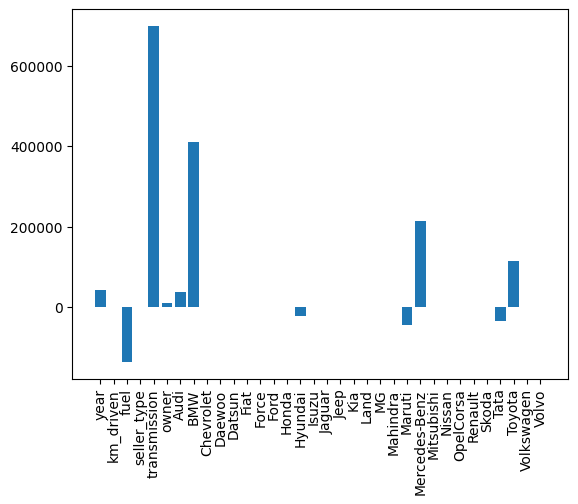

In [ ]:
plt.bar(x=X.columns,height=ls.coef_)
plt.xticks(rotation=90)
plt.show()

With the help of the above diagram. I can see that if there is increase in the Km-driven there will be decrease in the selling_price.